In [5]:
!pip install catboost
!pip install shap
!pip install xgboost shap

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,make_scorer
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [7]:
!unzip /content/playground-series-s4e1.zip

Archive:  /content/playground-series-s4e1.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Visulaizations and Data Analysis:

In [8]:
data = pd.read_csv("train.csv")
df = data

In [9]:
data.sample(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
100669,100669,15760851,Gratton,629,Spain,Male,41.0,3,0.00,2,1.0,1.0,93835.64,0
67917,67917,15681342,Chidi,711,France,Female,41.0,4,0.00,1,1.0,0.0,12761.25,1
135551,135551,15799042,Zaytseva,618,France,Male,41.0,7,0.00,1,1.0,1.0,63202.00,0
17721,17721,15619083,Chukwukere,646,Germany,Female,41.0,4,126273.95,1,1.0,1.0,70400.86,1
16967,16967,15593499,Pisano,588,France,Male,33.0,5,0.00,2,1.0,1.0,65675.47,0


In [10]:
data = data.drop(columns = ['id' , 'CustomerId' , 'Surname'] , axis = 1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


We can seee that the data does not contain any null values.


In [ ]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Now we will check if the CustomerId colmun has duplicated values

In [ ]:
duplicates = df['CustomerId'].duplicated(keep=False)



print("duplicates:", duplicates.sum())
print("unique:", df["CustomerId"].unique().shape[0])

duplicates: 155733
unique: 23221


## CreditScore

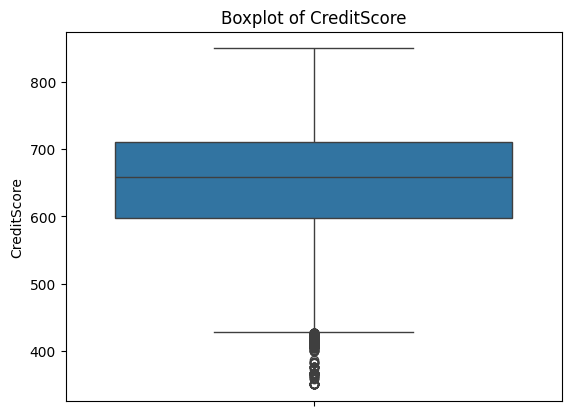

In [ ]:
sns.boxplot(y='CreditScore', data=df)

plt.title('Boxplot of CreditScore')
plt.ylabel('CreditScore')

plt.show()

We observe outliers in credit scores.

Next, we will examine whether low credit scores are concentrated alongside other factors such as age.

<ipython-input-104-42bc529d4230>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



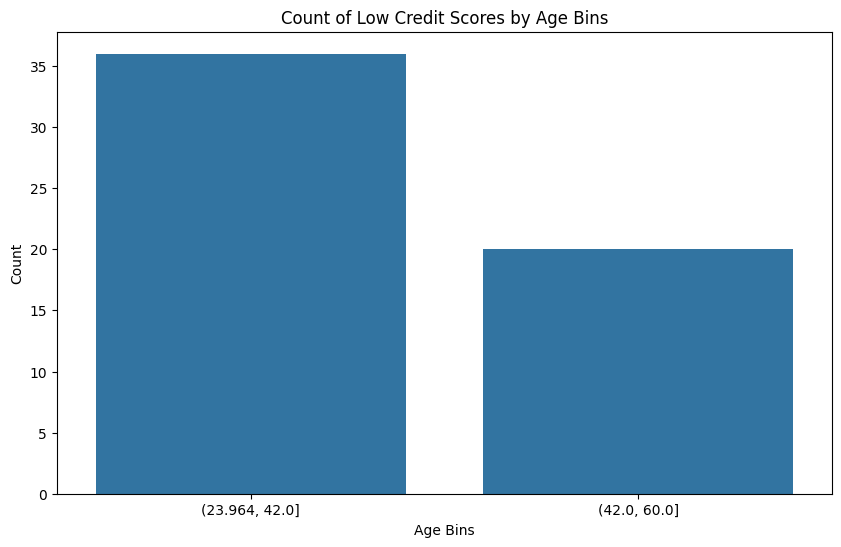

In [ ]:
low_credit_scores = df[df['CreditScore'] < 400]

low_credit_scores['AgeBin'] = pd.cut(low_credit_scores['Age'], bins=2)

age_counts = low_credit_scores['AgeBin'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index.astype(str), y=age_counts.values)
plt.title('Count of Low Credit Scores by Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.show()


It appears that younger customers tend to have lower credit scores

## Age

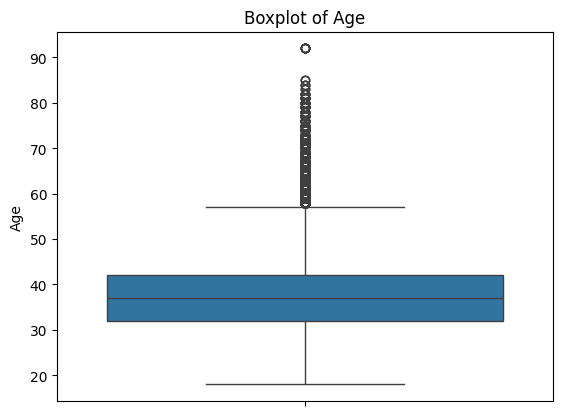

In [ ]:
sns.boxplot(y='Age', data=df)

plt.title('Boxplot of Age')
plt.ylabel('Age')

plt.show()

## Geography

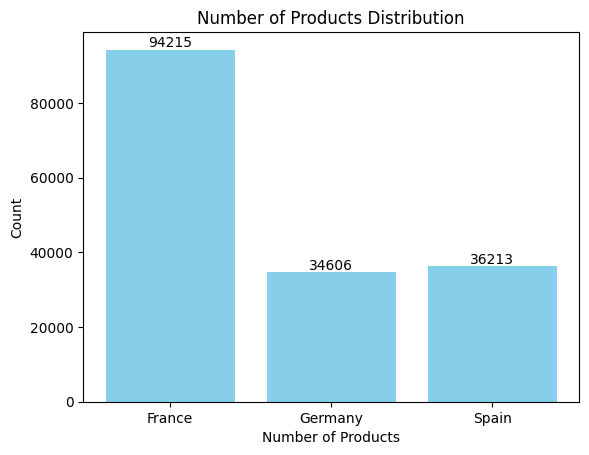

In [ ]:
value_counts = df['Geography'].value_counts().sort_index()

bars = plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Number of Products Distribution')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.show()

## Correlations matrix

<Axes: >

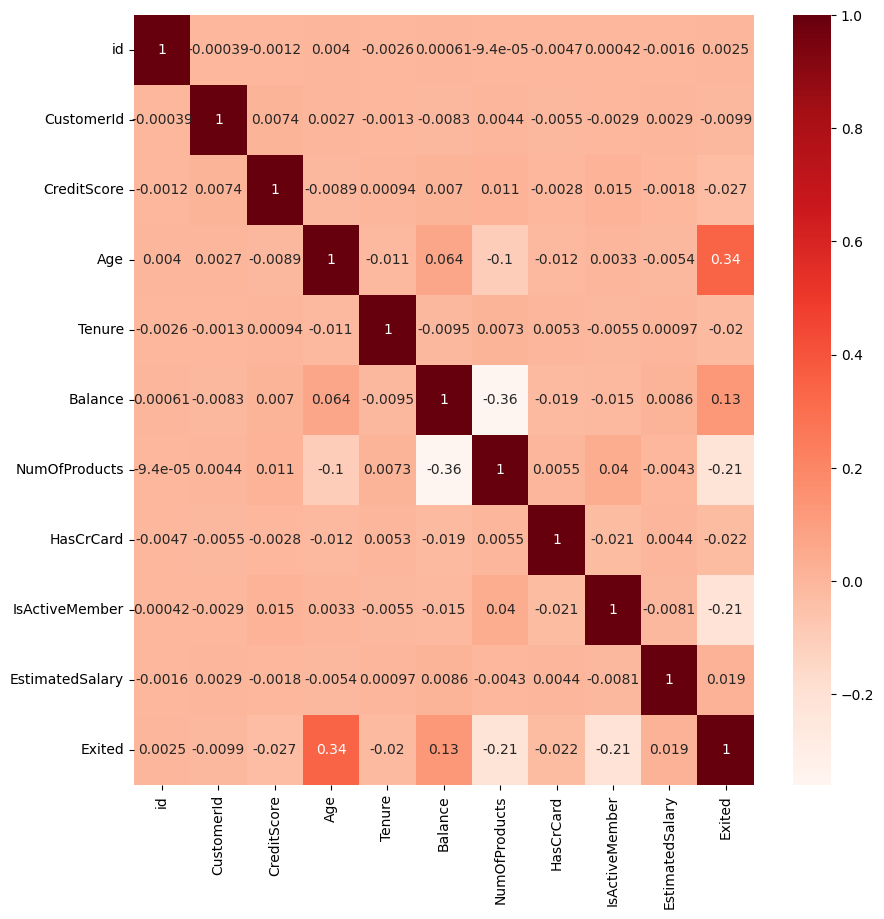

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(),cbar=True,annot=True,cmap='Reds')

*The* heatmap indicates that there is no strong correlation between the features.

## CreditScore distribution for different ages

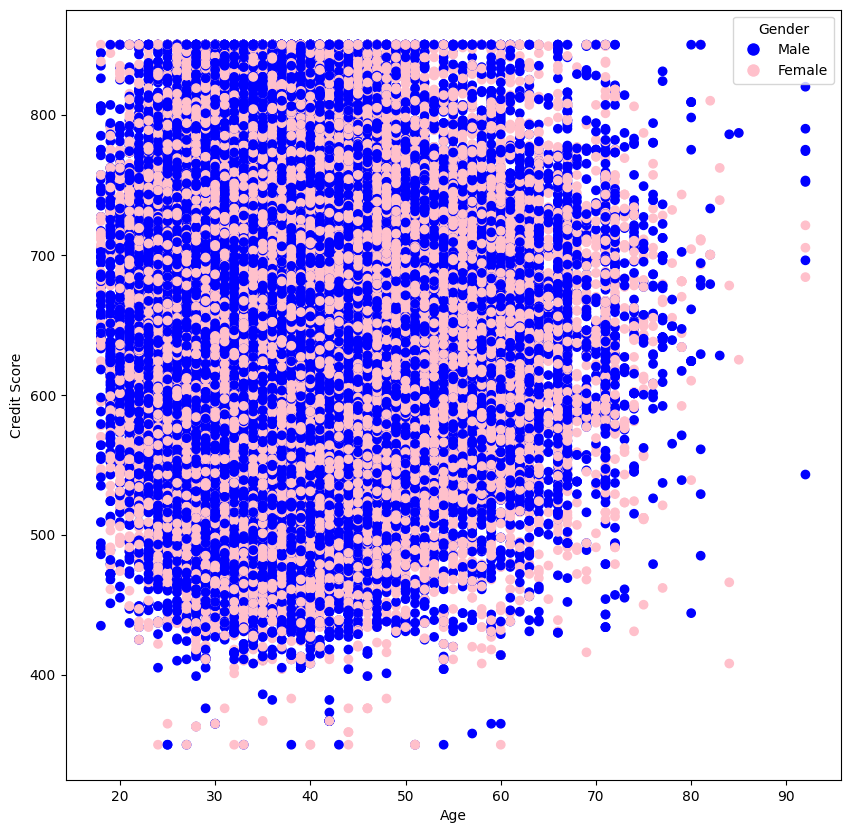

In [ ]:
color_mapping = {'Male': 'blue', 'Female': 'pink'}
colors = df['Gender'].map(color_mapping)

plt.figure(figsize=(10,10))
plt.scatter(x='Age',y='CreditScore', c=colors,data=df)
plt.xlabel('Age')
plt.ylabel('Credit Score')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=gender)
           for gender, color in color_mapping.items()]
plt.legend(title='Gender', handles=handles)

We can see that most customers are young with high credit scores.

Additionally, gender does not appear to correlate strongly with any observable trends.

## Balance

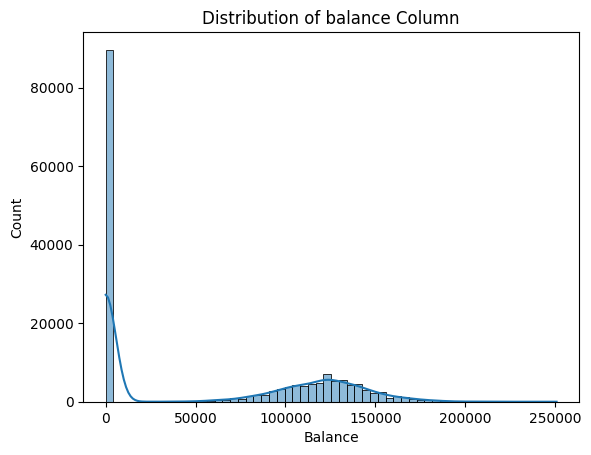

In [ ]:
sns.histplot(df['Balance'], kde=True)
# plt.xlabel('Float Column')
# plt.ylabel('Density')
plt.title('Distribution of balance Column')
plt.show()

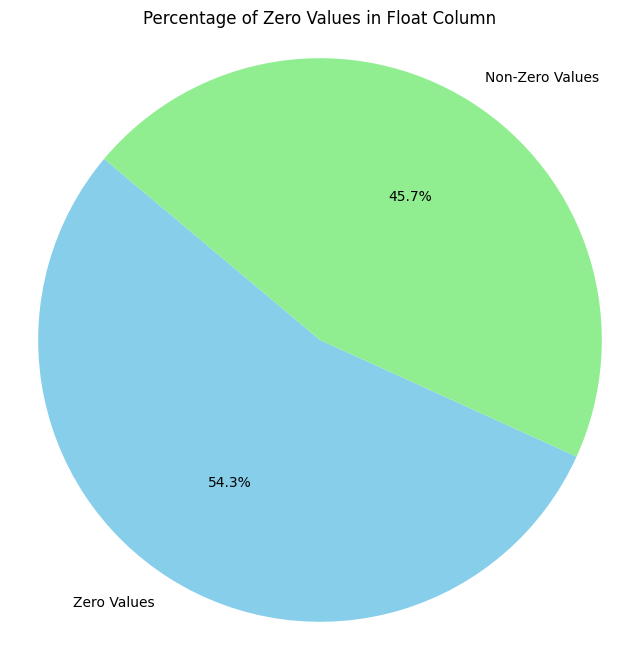

In [ ]:
zero_count = (df['Balance'] == 0).sum()
non_zero_count = (df['Balance'] != 0).sum()

labels = ['Zero Values', 'Non-Zero Values']
sizes = [zero_count, non_zero_count]


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Percentage of Zero Values in Float Column')
plt.axis('equal')
plt.show()

The plots illustrates that approximately half of the customers have a balance of zero.

## Num of Products

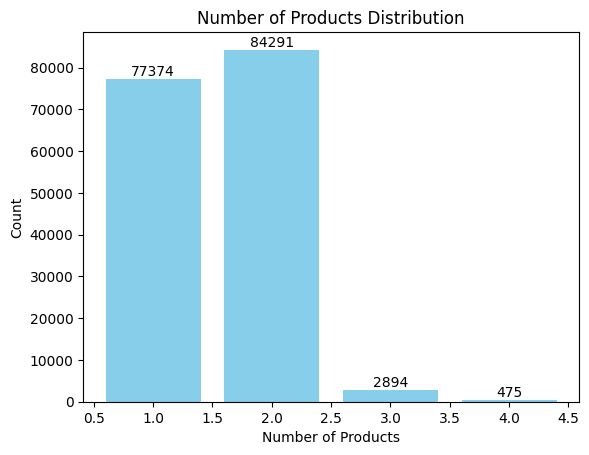

In [ ]:
value_counts = df['NumOfProducts'].value_counts().sort_index()

bars = plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Number of Products Distribution')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.show()

## Credit card

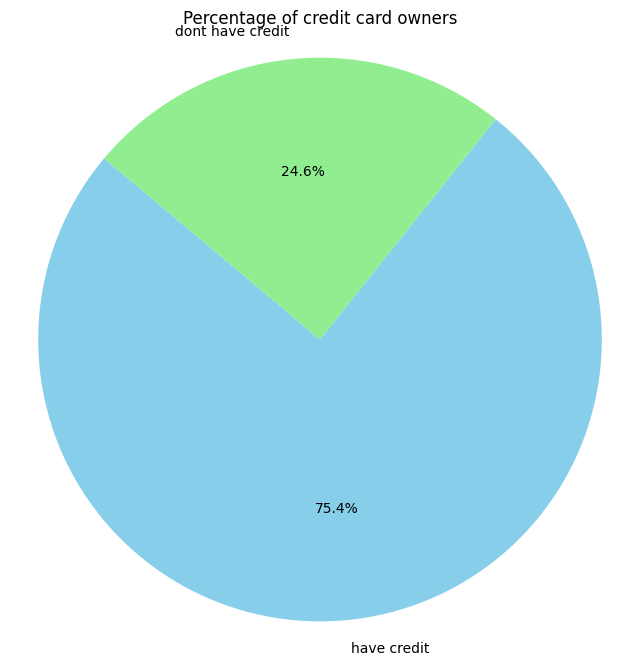

In [ ]:
no_cr = (df['HasCrCard'] == 0).sum()
cr = (df['HasCrCard'] != 0).sum()

labels = ['have credit', 'dont have credit']
sizes = [cr, no_cr]


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Percentage of credit card owners')
plt.axis('equal')
plt.show()

## Active members

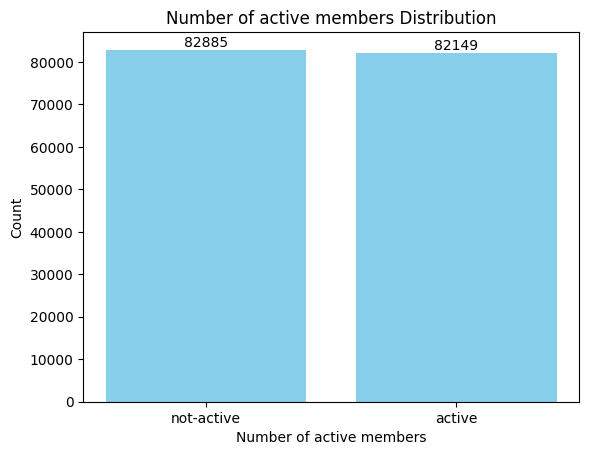

In [ ]:
value_counts = df['IsActiveMember'].value_counts().sort_index()

bars = plt.bar(["not-active", "active"], value_counts.values, color='skyblue')
plt.xlabel('Number of active members')
plt.ylabel('Count')
plt.title('Number of active members Distribution')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.show()

We can see that nearly half of the members are inactive, which aligns with the presence of duplicate customer IDs

## Estimated salary

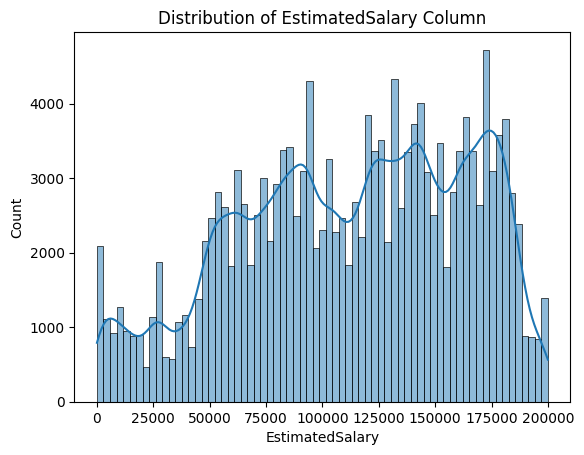

In [ ]:
sns.histplot(df['EstimatedSalary'], kde=True)
# plt.xlabel('Float Column')
# plt.ylabel('Density')
plt.title('Distribution of EstimatedSalary Column')
plt.show()

## Exited

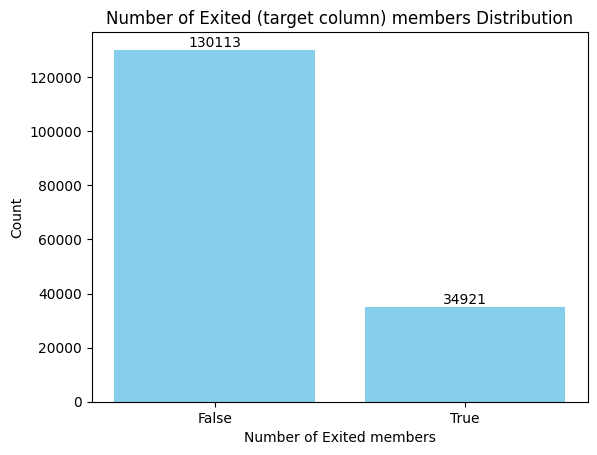

In [ ]:
value_counts = df['Exited'].value_counts().sort_index()

bars = plt.bar(["False", "True"], value_counts.values, color='skyblue')
plt.xlabel('Number of Exited members')
plt.ylabel('Count')
plt.title('Number of Exited (target column) members Distribution')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.show()

We observe that the label columns are unbalanced.

# Models

In [12]:
data['Gender'] = data['Gender'].map({'Male' : 0 , 'Female' : 1})

In [13]:
# data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Old'])
# data.drop('Age', axis=1, inplace=True)

In [14]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

geo_data = encoder.fit_transform(data[['Geography']])
data_geo_df = pd.DataFrame(geo_data, columns=encoder.get_feature_names_out(["Geography"]))

data = pd.concat([data.drop("Geography", axis=1).reset_index(drop=True), data_geo_df], axis=1)
data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,668,0,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,0.0,0.0
1,627,0,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,0.0,0.0
2,678,0,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,0.0,0.0
3,581,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,0.0,0.0
4,716,0,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,1,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.0,0.0,1.0
165030,792,0,35.0,3,0.00,1,0.0,0.0,131834.45,0,1.0,0.0,0.0
165031,565,0,31.0,5,0.00,1,1.0,1.0,127429.56,0,1.0,0.0,0.0
165032,554,1,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0.0,0.0,1.0


In [15]:
# age_data = encoder.fit_transform(data[['AgeGroup']])
# data_age_df = pd.DataFrame(age_data, columns=encoder.get_feature_names_out(["AgeGroup"]))
# data = pd.concat([data.drop("AgeGroup", axis=1).reset_index(drop=True), data_age_df], axis=1)

In [16]:
y = data['Exited']
x = data.drop('Exited' , axis = 1)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x = sc.fit_transform(x)

## ANOVA test (Importance features):

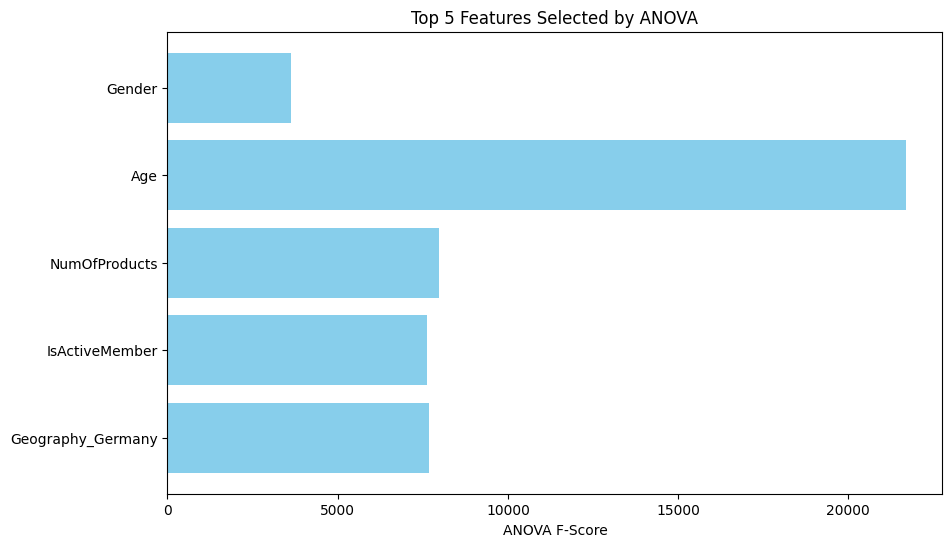

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
# Select the top k features using ANOVA
k = 5
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(x, y)

# Get the scores and indices of the top k features
scores = selector.scores_
indices = selector.get_support(indices=True)
top_scores = scores[indices]
top_features = [x.columns[i] for i in indices]

# Plotting the top k features
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_scores, color='skyblue')
plt.xlabel('ANOVA F-Score')
plt.title(f'Top {k} Features Selected by ANOVA')
plt.gca().invert_yaxis()
plt.show()

## Compare models:

Evaluating Logistic Regression...
Logistic Regression Mean Cross-Validation accuracy: 0.6857072190549587
Logistic Regression Mean Cross-Validation precision: 0.3687281770514813
Logistic Regression Mean Cross-Validation recall: 0.6813242501072592


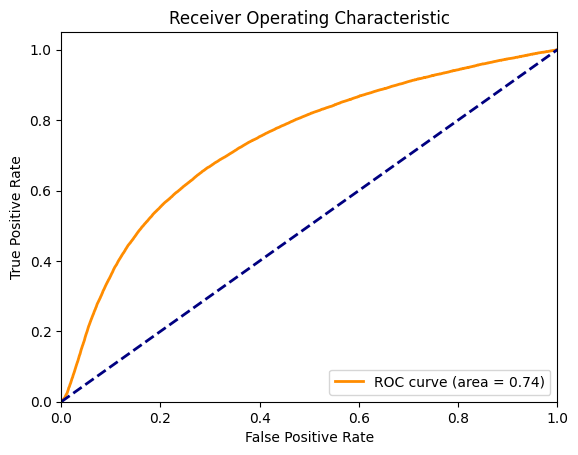

Evaluating Decision Tree Classifier...
Decision Tree Classifier Mean Cross-Validation accuracy: 0.8094756380169013
Decision Tree Classifier Mean Cross-Validation precision: 0.5344111789283589
Decision Tree Classifier Mean Cross-Validation recall: 0.7760329482431993


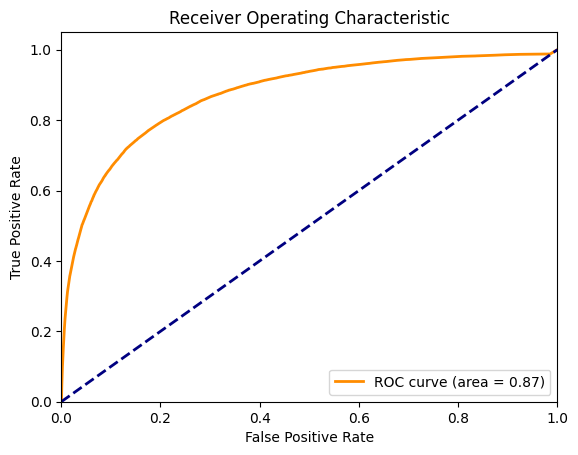

Evaluating Random Forest Classifier...
Random Forest Classifier Mean Cross-Validation accuracy: 0.8166196236328188
Random Forest Classifier Mean Cross-Validation precision: 0.5465846470726989
Random Forest Classifier Mean Cross-Validation recall: 0.7825269514212059


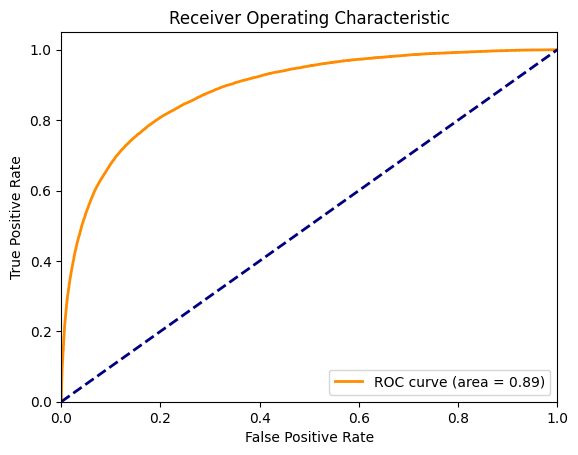

Evaluating Gradient Boosting Classifier...
Gradient Boosting Classifier Mean Cross-Validation accuracy: 0.8653489675300741
Gradient Boosting Classifier Mean Cross-Validation precision: 0.7464877163139639
Gradient Boosting Classifier Mean Cross-Validation recall: 0.5505866528950085


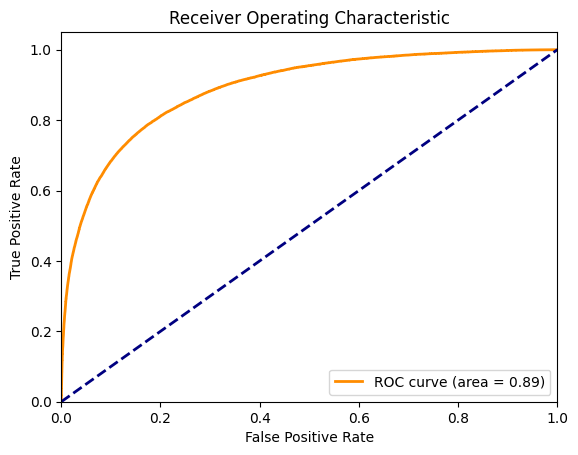

Evaluating XGBoost Classifier...
XGBoost Classifier Mean Cross-Validation accuracy: 0.8657185807724439
XGBoost Classifier Mean Cross-Validation precision: 0.7410861498759215
XGBoost Classifier Mean Cross-Validation recall: 0.5615602206082299


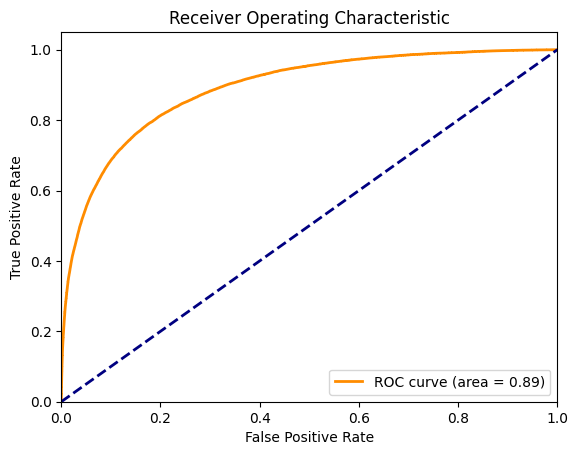

Evaluating CatBoost Classifier...
CatBoost Classifier Mean Cross-Validation accuracy: 0.8656034593689675
CatBoost Classifier Mean Cross-Validation precision: 0.75365934671188
CatBoost Classifier Mean Cross-Validation recall: 0.5419279661118666


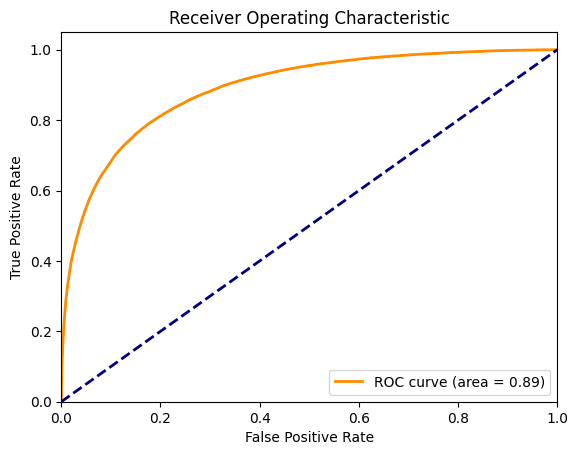

Evaluating K-Nearest Neighbors Classifier...
K-Nearest Neighbors Classifier Mean Cross-Validation accuracy: 0.72723194227322
K-Nearest Neighbors Classifier Mean Cross-Validation precision: 0.28654830497206624
K-Nearest Neighbors Classifier Mean Cross-Validation recall: 0.19404343014088693


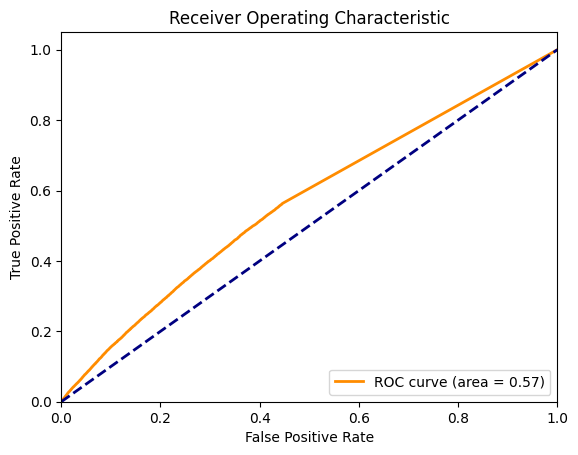

Evaluating AdaBoost Classifier...
AdaBoost Classifier Mean Cross-Validation accuracy: 0.8587988059956724
AdaBoost Classifier Mean Cross-Validation precision: 0.7487406445698856
AdaBoost Classifier Mean Cross-Validation recall: 0.5007111284667646


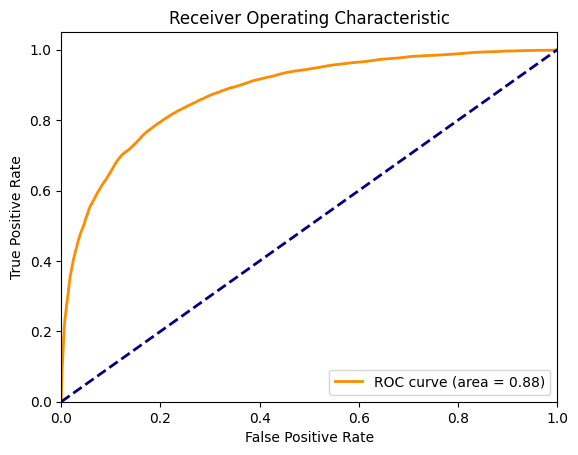

Evaluating Naive Bayes Classifier...
Naive Bayes Classifier Mean Cross-Validation accuracy: 0.7928669225199114
Naive Bayes Classifier Mean Cross-Validation precision: 0.5291796363629984
Naive Bayes Classifier Mean Cross-Validation recall: 0.1911898553663393


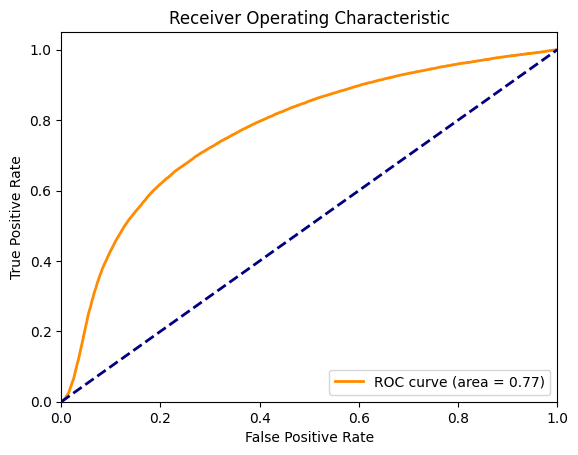

In [ ]:
# Define models and their respective hyperparameter grids:
models = {
    'Logistic Regression': (LogisticRegression(class_weight='balanced', random_state=42), {
        'C': [0.01, 0.1, 1, 10, 100]
    }),
    'Decision Tree Classifier': (DecisionTreeClassifier(class_weight='balanced', random_state=42), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'Random Forest Classifier': (RandomForestClassifier(class_weight='balanced', random_state=42), {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20]
    }),
    'Gradient Boosting Classifier': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 4]
    }),
    'XGBoost Classifier': (XGBClassifier(random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }),
    'CatBoost Classifier': (CatBoostClassifier(silent=True, random_seed=42, class_weights=[1, 1]), {
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [3, 4]
    }),
    'K-Nearest Neighbors Classifier': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }),
    'AdaBoost Classifier': (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'Naive Bayes Classifier': (GaussianNB(), {})
}

# Custom scoring function for recall
recall_scorer = make_scorer(recall_score)

# Initialize KFold:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform hyperparameter tuning and evaluation
for model_name, (model, param_grid) in models.items():
    print(f"Evaluating {model_name}...")
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    # Initialize arrays to store true labels and predicted probabilities:
    y_true = []
    y_proba = []

    # Initialize GridSearchCV
    grid_search = GridSearchCV(model, param_grid, scoring=recall_scorer, cv=kf)

    # Fit the grid search to the data
    grid_search.fit(x, y)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Perform K-Fold Cross-Validation with the best model to get the recall
    fold_recalls = []
    y_true = []
    y_proba = []

    for train_index, test_index in kf.split(x):
        x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Train the best model on the training fold
        best_model.fit(x_train_fold, y_train_fold)
        # Evaluate the model on the validation fold
        y_test_pred = best_model.predict(x_test_fold)
        # Predict probabilities on the test data
        y_test_proba = best_model.predict_proba(x_test_fold)[:, 1]
        fold_accuracy = accuracy_score(y_test_fold, y_test_pred)
        fold_precision = precision_score(y_test_fold, y_test_pred)
        fold_recall = recall_score(y_test_fold, y_test_pred)
        fold_accuracies.append(fold_accuracy)
        fold_precisions.append(fold_precision)
        fold_recalls.append(fold_recall)
        # Accumulate true labels and predicted probabilities:
        y_true.extend(y_test_fold)
        y_proba.extend(y_test_proba)

    # Compute ROC curve and AUC score:
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)
    # Print cross-validation results:
    print(f"{model_name} Mean Cross-Validation accuracy: {np.mean(fold_accuracies)}")
    print(f"{model_name} Mean Cross-Validation precision: {np.mean(fold_precisions)}")
    print(f"{model_name} Mean Cross-Validation recall: {np.mean(fold_recalls)}")
    # Plot the ROC curve:
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

## Optimized Model for Accuracy (XGBOOST):

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 1.0],
    'gamma': [0, 0.1, 0.2]}

# Initialize XGBClassifier:
xgb = XGBClassifier(random_state=42)

# Initialize GridSearchCV with recall scoring:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=10, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the data:
grid_search.fit(x, y)

# Print best parameters and best score:
print("Best Parameters found: ", grid_search.best_params_)
print("Best Accuracy Score found: ", grid_search.best_score_)
# Optionally, you can also print the best estimator:
print("Best Estimator found: ", grid_search.best_estimator_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
Best Recall Score found:  0.8661245532437307
Best Estimator found:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


## Run the best XGBOOST model:

xgb Mean Cross-Validation accuracy: 0.8660760918952178
xgb Mean Cross-Validation precision: 0.7428847641876704
xgb Mean Cross-Validation recall: 0.5612991098415789


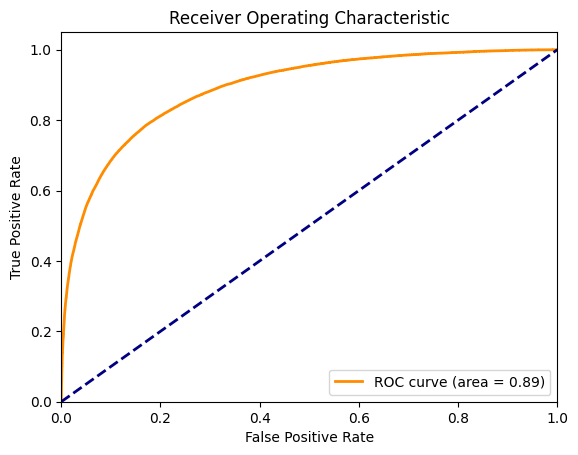

In [11]:
import xgboost as xgb
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Accuracy, Recall and Precision of the optimized model:
fold_accuracies = []
fold_precisions = []
fold_recalls = []
# Initialize arrays to store true labels and predicted probabilities:
y_true = []
y_proba = []
# Optimized model:
xgb_model = xgb.XGBClassifier(colsample_bytree = 1.0, gamma = 0.2, learning_rate = 0.05,
                          max_depth = 5, n_estimators = 200, subsample = 0.6)
# Perform Kfold Cross Validation:
for train_index, test_index in kf.split(x):
    # Split data into Kfold:
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    # Train the model on the training fold:
    xgb_model.fit(x_train_fold, y_train_fold)
    # Evaluate the model on the validation fold:
    y_test_pred = xgb_model.predict(x_test_fold)
    # Predict probabilities on the test data:
    y_test_proba = xgb_model.predict_proba(x_test_fold)[:, 1]
    fold_accuracy = accuracy_score(y_test_fold, y_test_pred)
    fold_precision = precision_score(y_test_fold, y_test_pred)
    fold_recall = recall_score(y_test_fold, y_test_pred)
    fold_accuracies.append(fold_accuracy)
    fold_precisions.append(fold_precision)
    fold_recalls.append(fold_recall)
    # Accumulate true labels and predicted probabilities:
    y_true.extend(y_test_fold)
    y_proba.extend(y_test_proba)

# Compute ROC curve and AUC score:
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
auc_score = roc_auc_score(y_true, y_proba)
model_name = "xgb"
# Print cross-validation results:
print(f"{model_name} Mean Cross-Validation accuracy: {np.mean(fold_accuracies)}")
print(f"{model_name} Mean Cross-Validation precision: {np.mean(fold_precisions)}")
print(f"{model_name} Mean Cross-Validation recall: {np.mean(fold_recalls)}")
# Plot the ROC curve:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Optimized Model for Recall:

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters found:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Recall Score found:  0.7833261757533807
Random Forest Best hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Mean Cross-Validation recall: 0.7833261757533807


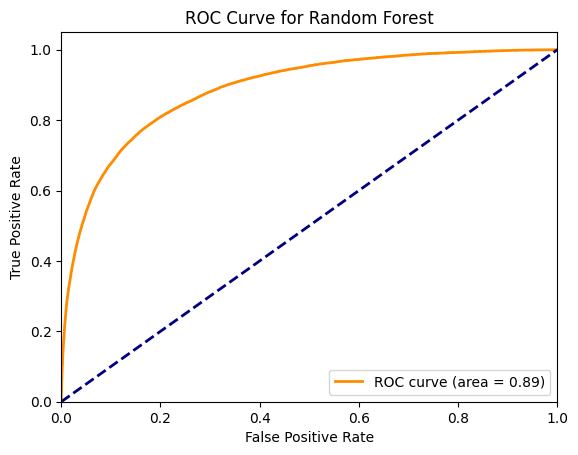

In [14]:
# Define a parameter grid for GridSearchCV:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

# Initialize RandomForestClassifier:
rf = RandomForestClassifier(class_weight='balanced',random_state=42)

# Custom scoring function for recall
recall_scorer = make_scorer(recall_score)

# Initialize KFold:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV with recall scoring:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=recall_scorer, cv=kf, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the data:
grid_search.fit(x, y)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Print best parameters and best score:
print("Best Parameters found: ", grid_search.best_params_)
print("Best Recall Score found: ", grid_search.best_score_)

# Perform K-Fold Cross-Validation with the best model to get the recall
fold_recalls = []
y_true = []
y_proba = []

for train_index, test_index in kf.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train the best model on the training fold
    best_model.fit(x_train_fold, y_train_fold)
    # Evaluate the model on the validation fold
    y_test_pred = best_model.predict(x_test_fold)
    # Predict probabilities on the test data
    y_test_proba = best_model.predict_proba(x_test_fold)[:, 1]
    fold_recall = recall_score(y_test_fold, y_test_pred)
    fold_recalls.append(fold_recall)
    # Accumulate true labels and predicted probabilities
    y_true.extend(y_test_fold)
    y_proba.extend(y_test_proba)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
auc_score = roc_auc_score(y_true, y_proba)

# Print cross-validation results
print(f"Random Forest Best hyperparameters: {grid_search.best_params_}")
print(f"Random Forest Mean Cross-Validation recall: {np.mean(fold_recalls)}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

## Run the best Random Forest:

Training Recall: 0.8050
Training Accuracy: 0.8319
Training Percision: 0.5744
Training ROC AUC Score: 0.9033


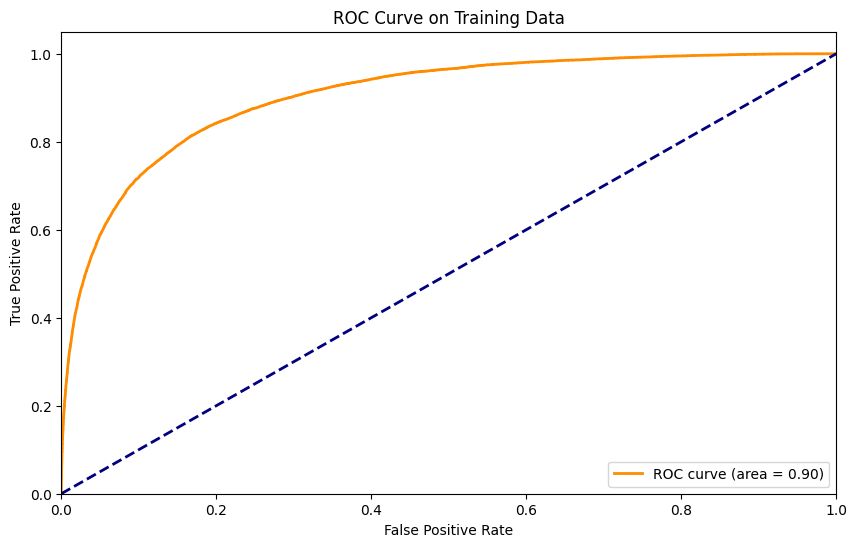

In [60]:
# Split the data
X_rftrain, X_rftest, y_rftrain, y_rftest = train_test_split(x, y, test_size=0.3, random_state=42)

# Train the model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=10, min_samples_split=5, n_estimators=200)
rf_model.fit(X_rftrain, y_rftrain)

# Predict on the training data
y_train_pred = rf_model.predict(X_rftrain)
y_train_proba = rf_model.predict_proba(X_rftrain)[:, 1]  # Probability estimates for the positive class

# Calculate recall
train_recall = recall_score(y_rftrain, y_train_pred)
train_accuracy = accuracy_score(y_rftrain, y_train_pred)
train_precision = precision_score(y_rftrain, y_train_pred)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_rftrain, y_train_proba)
train_auc = roc_auc_score(y_rftrain, y_train_proba)

# Print recall and AUC score
print(f"Training Recall: {train_recall:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Percision: {train_precision:.4f}")
print(f"Training ROC AUC Score: {train_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {train_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Training Data')
plt.legend(loc="lower right")
plt.show()

## SHAP for XGBOOST:

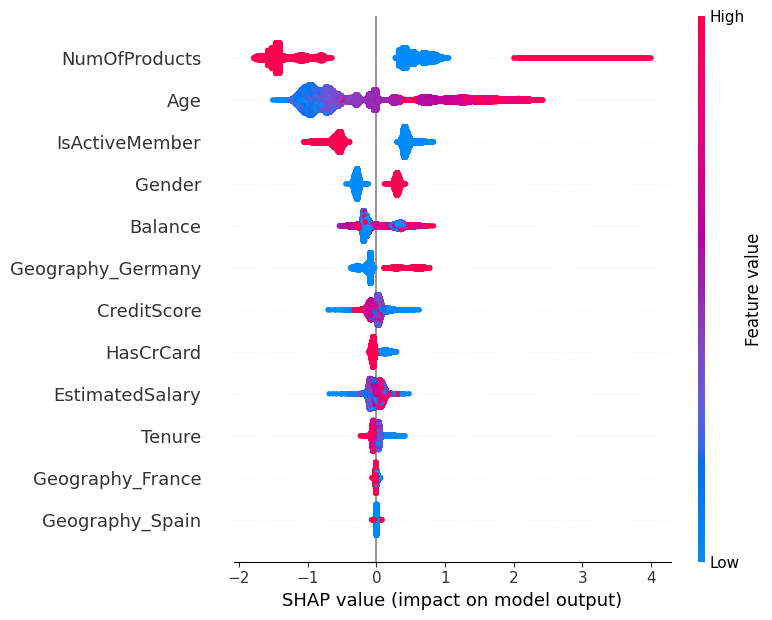

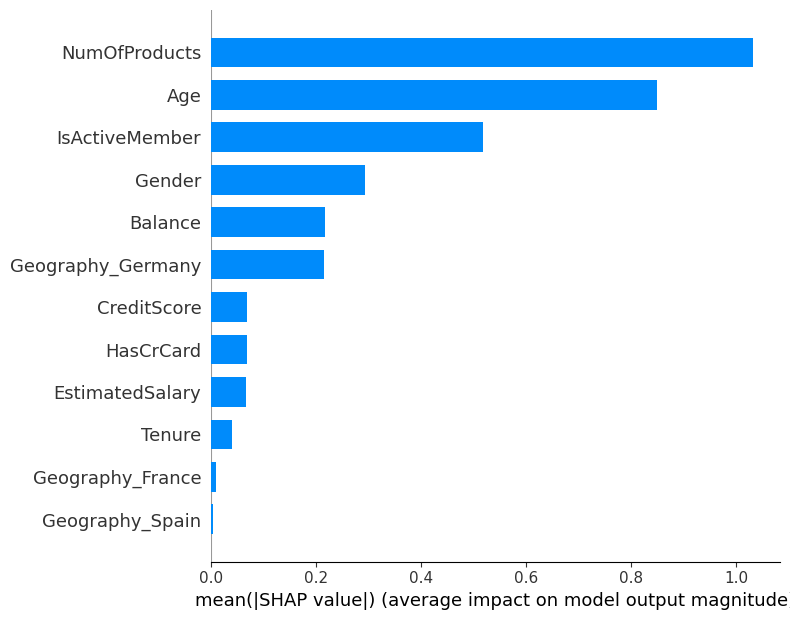

In [12]:
import xgboost as xgb
import shap

# SHAP analysis
# Calculate SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(x)

# Summary plot
shap.summary_plot(shap_values, x)

# Bar plot of feature importance
shap.summary_plot(shap_values, x, plot_type="bar")

In [ ]:
import graphviz
dot_data = xgb.to_graphviz(xgb_model, num_trees=0)
graph = graphviz.Source(dot_data.source)
graph.render('xgboost_tree', format='png', view=True)

## Evaluating the XGBoost model

Training Accuracy: 0.8690
Training Precision: 0.7536
Training Recall: 0.5696
Training F1 Score: 0.6488
Training ROC-AUC Score: 0.8961
----------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     39133
           1       0.74      0.56      0.64     10378

    accuracy                           0.87     49511
   macro avg       0.81      0.75      0.78     49511
weighted avg       0.86      0.87      0.86     49511

Test Precision: 0.7392
Test Accuracy: 0.8663
Test Recall: 0.5597
Test F1 Score: 0.6371
Test ROC AUC Score: 0.8900


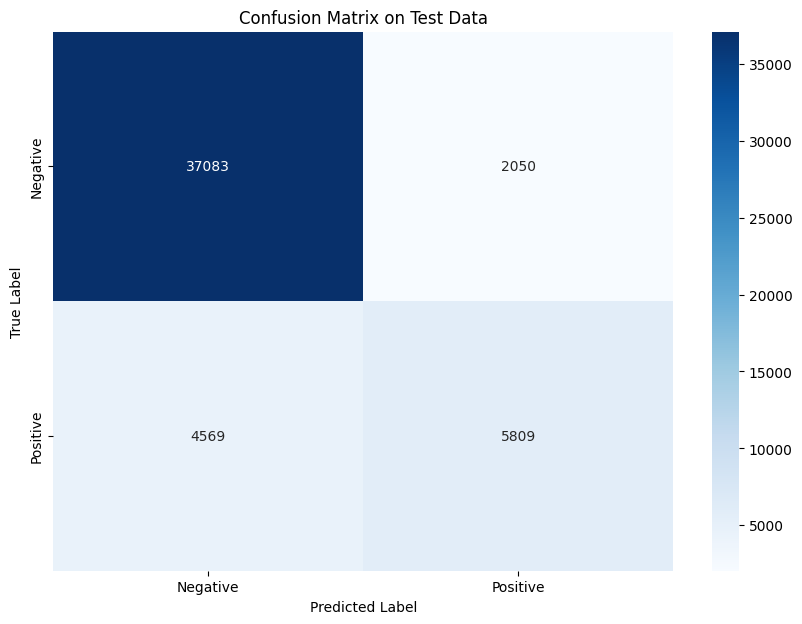

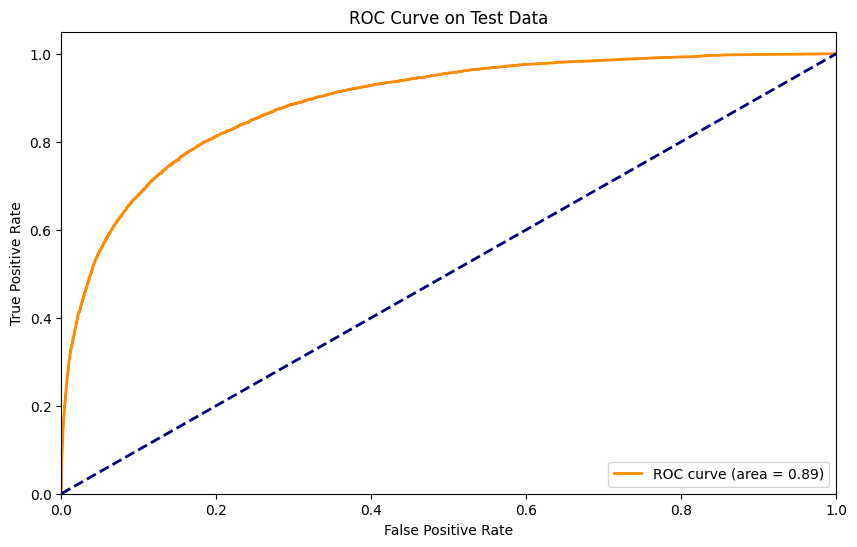

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score
import seaborn as sns

# Split the data into training and test sets
X_xgbtrain, X_xgbtest, y_xgbtrain, y_xgbtest = train_test_split(x, y, test_size=0.3, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(colsample_bytree = 1.0, gamma = 0.2, learning_rate = 0.05,
                          max_depth = 5, n_estimators = 200, subsample = 0.6)
xgb_model.fit(X_xgbtrain, y_xgbtrain)

# Predict on the training data
y_xgbtrain_pred = xgb_model.predict(X_xgbtrain)
y_xgbtrain_proba = xgb_model.predict_proba(X_xgbtrain)[:, 1]  # Probability estimates for the positive class

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_xgbtrain, y_xgbtrain_pred)
train_precision = precision_score(y_xgbtrain, y_xgbtrain_pred)
train_recall = recall_score(y_xgbtrain, y_xgbtrain_pred)
train_f1 = f1_score(y_xgbtrain, y_xgbtrain_pred)
train_auc = roc_auc_score(y_xgbtrain, y_xgbtrain_proba)

# Print the metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Training ROC-AUC Score: {train_auc:.4f}")

# Predict on the test data
y_xgbtest_pred = xgb_model.predict(X_xgbtest)
y_xgbtest_proba = xgb_model.predict_proba(X_xgbtest)[:, 1]  # Probability estimates for the positive class

# Compute the confusion matrix
conf_xgbmatrix = confusion_matrix(y_xgbtest, y_xgbtest_pred)

# Compute additional metrics
test_xgbprecision = precision_score(y_xgbtest, y_xgbtest_pred)
test_xgbrecall = recall_score(y_xgbtest, y_xgbtest_pred)
test_xgbaccuracy = accuracy_score(y_xgbtest, y_xgbtest_pred)
test_xgbf1 = f1_score(y_xgbtest, y_xgbtest_pred)
test_xgbauc = roc_auc_score(y_xgbtest, y_xgbtest_proba)

# Print metrics
print("----------------------------------------------------")
print("\nClassification Report:")
print(classification_report(y_xgbtest, y_xgbtest_pred))
print(f"Test Precision: {test_xgbprecision:.4f}")
print(f"Test Accuracy: {test_xgbaccuracy:.4f}")
print(f"Test Recall: {test_xgbrecall:.4f}")
print(f"Test F1 Score: {test_xgbf1:.4f}")
print(f"Test ROC AUC Score: {test_xgbauc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_xgbmatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Compute ROC curve and AUC score for test data
fpr, tpr, thresholds = roc_curve(y_xgbtest, y_xgbtest_proba)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {test_xgbauc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Data')
plt.legend(loc="lower right")
plt.show()

## PFI graph for Random Forest:

In [34]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf_model, X_rftest, y_rftest, n_repeats=10, random_state=0, n_jobs=-1)
# Get the feature importances
feature_importances_skl = {feature: {'mean': mean, 'std': std} for feature, mean, std in zip(X_test.columns, result.importances_mean, result.importances_std)}
feature_importances_skl = sorted(feature_importances_skl.items(), key=lambda x: x[1]['mean'], reverse=True)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


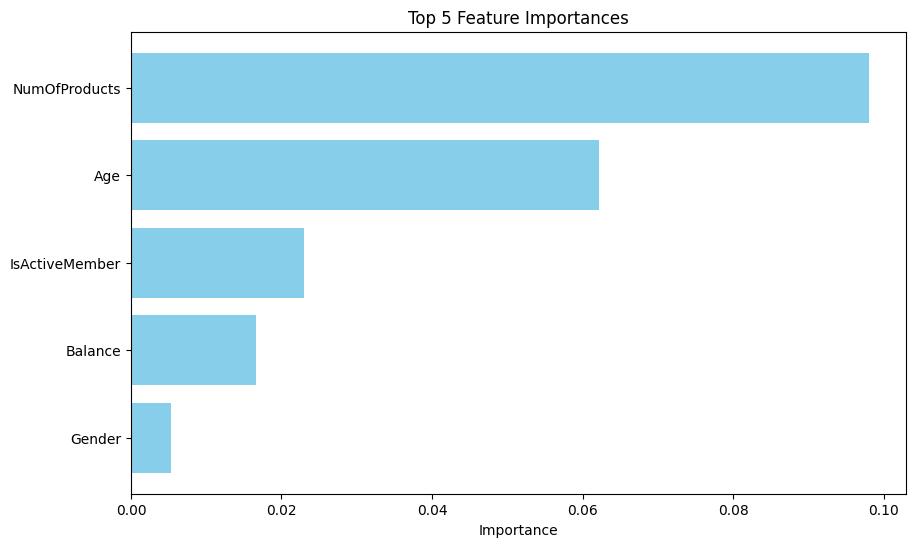

In [66]:
k=5
df_skl = pd.DataFrame([{'feature': feature, 'importance': importance['mean'], 'std': importance['std']} for feature, importance in feature_importances_skl[:k]])
# Plotting the top 5 feature importances
plt.figure(figsize=(10, 6))
plt.barh(df_skl['feature'], df_skl['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## Evaluating the Random Forest model


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     39133
           1       0.55      0.78      0.64     10378

    accuracy                           0.82     49511
   macro avg       0.74      0.80      0.76     49511
weighted avg       0.85      0.82      0.83     49511

Test Precision: 0.5474
Test Accuracy: 0.8186
Test Recall: 0.7763
Test F1 Score: 0.6421
Test ROC AUC Score: 0.8864


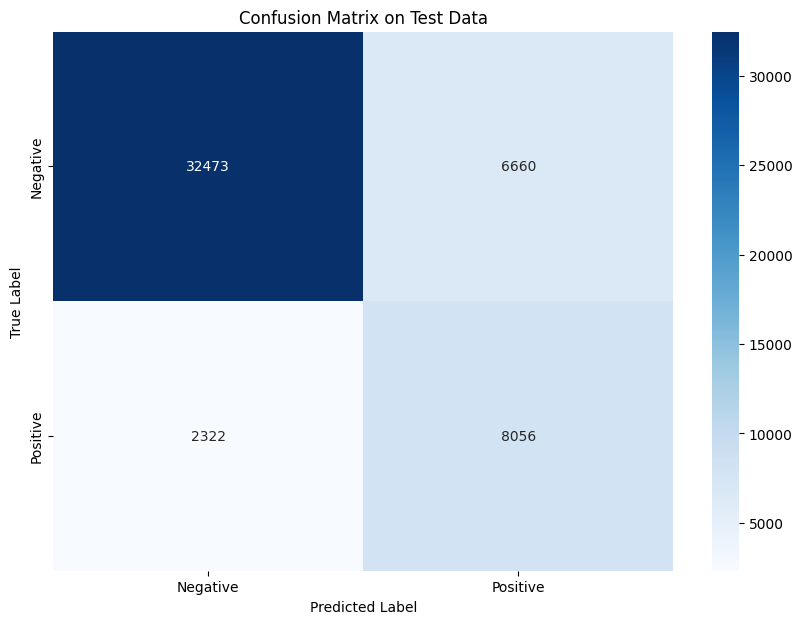

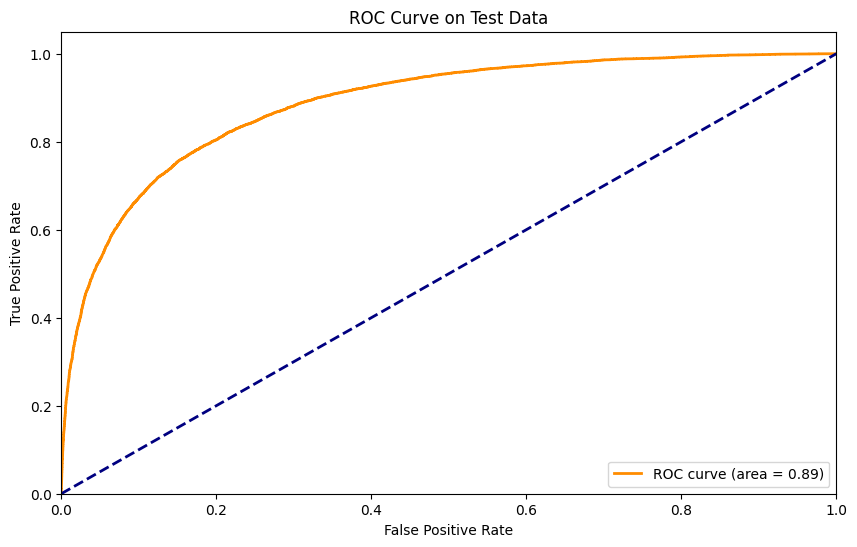

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
# Predict on the test data
y_rftest_pred = rf_model.predict(X_rftest)
y_rftest_proba = rf_model.predict_proba(X_rftest)[:, 1]  # Probability estimates for the positive class

# Compute the confusion matrix
conf_rfmatrix = confusion_matrix(y_rftest, y_rftest_pred)

# Compute additional metrics
test_rfprecision = precision_score(y_rftest, y_rftest_pred)
test_rfaccuracy = accuracy_score(y_rftest, y_rftest_pred)
test_rfrecall = recall_score(y_rftest, y_rftest_pred)
test_rff1 = f1_score(y_rftest, y_rftest_pred)
test_rfauc = roc_auc_score(y_rftest, y_rftest_proba)

# Print metrics
print("\nClassification Report:")
print(classification_report(y_rftest, y_rftest_pred))
print(f"Test Precision: {test_rfprecision:.4f}")
print(f"Test Accuracy: {test_rfaccuracy:.4f}")
print(f"Test Recall: {test_rfrecall:.4f}")
print(f"Test F1 Score: {test_rff1:.4f}")
print(f"Test ROC AUC Score: {test_rfauc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_rfmatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Compute ROC curve and AUC score for test data
fpr, tpr, thresholds = roc_curve(y_rftest, y_rftest_proba)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {test_rfauc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Data')
plt.legend(loc="lower right")
plt.show()

# Artificial Neural Network

## Data Preprocessing for NN


In [46]:
df=pd.read_csv("train.csv")

In [47]:
X=df.iloc[:, 3:-1].values
y=df.iloc[:,-1].values

## Encoding categorical data

### Label Encoding the "Gender" column

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [49]:
X

array([[668, 'France', 1, ..., 1.0, 0.0, 181449.97],
       [627, 'France', 1, ..., 1.0, 1.0, 49503.5],
       [678, 'France', 1, ..., 1.0, 0.0, 184866.69],
       ...,
       [565, 'France', 1, ..., 1.0, 1.0, 127429.56],
       [554, 'Spain', 0, ..., 0.0, 1.0, 71173.03],
       [850, 'France', 1, ..., 1.0, 0.0, 61581.79]], dtype=object)

### One Hot Encoding the "Geography" column

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.15, random_state = 0)

### Standardiztion (so important for NN)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building the ANN

In [56]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units= 9, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units= 27, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam' , loss = 'binary_crossentropy' ,metrics = ['accuracy'])

In [ ]:
tf.keras.utils.plot_model(ann, show_shapes=True, rankdir="LR")

## Part 3:- Training the ANN

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 25)

Epoch 1/25
4384/4384 [==============================] - 18s 4ms/step - loss: 0.3687 - accuracy: 0.8416
Epoch 2/25
4384/4384 [==============================] - 8s 2ms/step - loss: 0.3291 - accuracy: 0.8626
Epoch 3/25
4384/4384 [==============================] - 9s 2ms/step - loss: 0.3261 - accuracy: 0.8639
Epoch 4/25
4384/4384 [==============================] - 9s 2ms/step - loss: 0.3252 - accuracy: 0.8640
Epoch 5/25
4384/4384 [==============================] - 8s 2ms/step - loss: 0.3247 - accuracy: 0.8639
Epoch 6/25
4384/4384 [==============================] - 9s 2ms/step - loss: 0.3241 - accuracy: 0.8641
Epoch 7/25
4384/4384 [==============================] - 8s 2ms/step - loss: 0.3241 - accuracy: 0.8645
Epoch 8/25
4384/4384 [==============================] - 9s 2ms/step - loss: 0.3238 - accuracy: 0.8645
Epoch 9/25
4384/4384 [==============================] - 10s 2ms/step - loss: 0.3240 - accuracy: 0.8647
Epoch 10/25
4384/4384 [==============================] - 8s 2ms/step - loss: 0.3

## Evaluating the ANN model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = ann.predict(X_test)
y_pred =np.where(y_pred > 0.5,1,0)

774/774 [==============================] - 1s 1ms/step


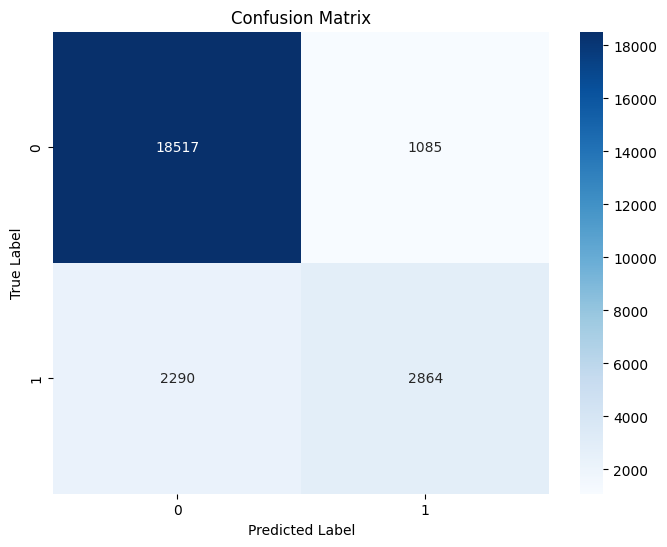

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     19602
           1       0.73      0.56      0.63      5154

    accuracy                           0.86     24756
   macro avg       0.81      0.75      0.77     24756
weighted avg       0.86      0.86      0.86     24756



## SHAP for Neural Network model

In [ ]:
df.columns[3:]
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
# len(feature_names)
tester.shape

(50, 12)

In [ ]:
shap_values.shape

(50, 12, 1)

In [ ]:
!pip install deepshap

ERROR: Could not find a version that satisfies the requirement deepshap (from versions: none)
ERROR: No matching distribution found for deepshap


In [ ]:
shap_values.reshape(12).shape, X_train[20,:].shape

((12,), (12,))

In [ ]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [ ]:
fn

['from France',
 'from Germany',
 'from Spain',
 'credit score',
 'gender',
 'age',
 'tenure',
 'balance',
 'number of products',
 'has credit card',
 'is active member',
 'estimated salary']

In [ ]:
shap.initjs()
explainer = shap.KernelExplainer(ann, X_train[:50,:])
shap_values = explainer.shap_values(X_train[:20,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values.reshape(20, 12), X_train[:20,:], feature_names=fn)


  0%|          | 0/20 [00:00<?, ?it/s]